In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)

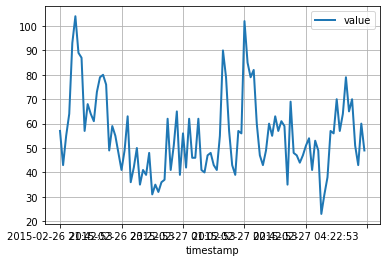

In [4]:
import matplotlib.pyplot as plt
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [3]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)


In [7]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer

estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

100%|██████████| 50/50 [00:11<00:00,  4.51it/s, epoch=10/10, avg_epoch_loss=3.94]


In [6]:
!pip install mxnet~=1.7

     |████████████████▏               | 23.7MB 16.1MB/s eta 0:00:02ERROR: panel 0.11.3 has requirement bokeh<2.4.0,>=2.3.0, but you'll have bokeh 2.1.1 which is incompatible.
ERROR: mosaic-visual-client 1.0.0 has requirement numpy==1.17.0, but you'll have numpy 1.20.3 which is incompatible.
ERROR: mosaic-visual-client 1.0.0 has requirement pandas==0.25.1, but you'll have pandas 1.1.4 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement numpy==1.16.0, but you'll have numpy 1.20.3 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement pandas==0.24.2, but you'll have pandas 1.1.4 which is incompatible.
ERROR: kyd 0.1.8 has requirement scikit-learn==0.20.3, but you'll have scikit-learn 0.21.3 which is incompatible.
  Found existing installation: urllib3 1.26.5
    Uninstalling urllib3-1.26.5:
      Successfully uninstalled urllib3-1.26.5
You should consider upgrading via the 'pip install --upgrade pip' command.


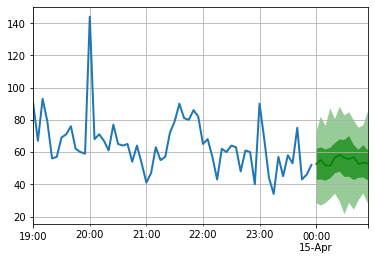

In [8]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')